In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np 
n_dots = 200

X = np.linspace(0, 1, n_dots)                   
y = np.sqrt(X) + 0.2*np.random.rand(n_dots) - 0.1;

X = X.reshape(-1, 1)
y = y.reshape(-1, 1)

# **Pipeline使用**
   - 需要导入的是多组元组数据 
       - polynomial_features
       - linear_regression

In [7]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

def polynomial_model(degree=1):
    polynomial_features = PolynomialFeatures(degree=degree,include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features),("linear_regression", linear_regression)])
    return pipeline


# **learning_curve** 的使用

> 对于评价拟合的效果，直接计算最小二乘误差，误差越大，拟合效果越差，这里直接调用learning_curve计算的score来代替误差值

- 输出变量：
    - train_sizes
    - train_scores
    - test_scores
    
## 构造 plot_learning_curve 函数需要满足:

- 通过learning_curve 输出 训练，测试的分数

- 通过fill_between 输出 red 表示训练带的方差 ； 输出 green 表示测试带的方差

    - train_sizes 的范围
    - 均值-方差 ：作为下界
    - 均值+方差 ： 作为上届

In [9]:
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o--', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

# ShuffleSplit的基础使用
- 需要传入的数据
    - n_splits:交叉的折数
    - 测试和训练的数据：`test_size`,`train_size` 
    - 可以设置随机的种子

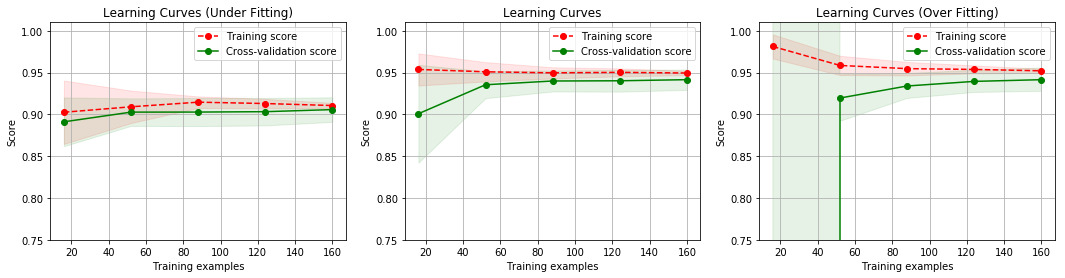

In [10]:
# 为了让学习曲线更平滑，交叉验证数据集的得分计算 10 次，每次都重新选中 20% 的数据计算一遍
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
titles = ['Learning Curves (Under Fitting)',
          'Learning Curves',
          'Learning Curves (Over Fitting)']
degrees = [1, 3, 10]

plt.figure(figsize=(18, 4))
for i in range(len(degrees)):
    plt.subplot(1, 3, i + 1)
    plot_learning_curve(polynomial_model(degrees[i]), titles[i], X, y, ylim=(0.75, 1.01), cv=cv)

plt.show()